# IMPORTS

In [3]:
# general import for data treatment and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
# models we will be using
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from matplotlib import gridspec
# mse: metric used
from sklearn.metrics import mean_squared_error, make_scorer

# INFOS ON THE DATASET

In [340]:
data= "SeoulBikeData.csv"

In [341]:
dataset = pd.read_csv(data, sep=',', encoding='latin1')

there is the need to specify the <b>encoding</b> because utf8 and by default didn't work

<i>(because the last columns of the dataset are string values where before it is int or float values)</i>

In [343]:
dataset.shape

(8760, 14)

In [345]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [344]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [339]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


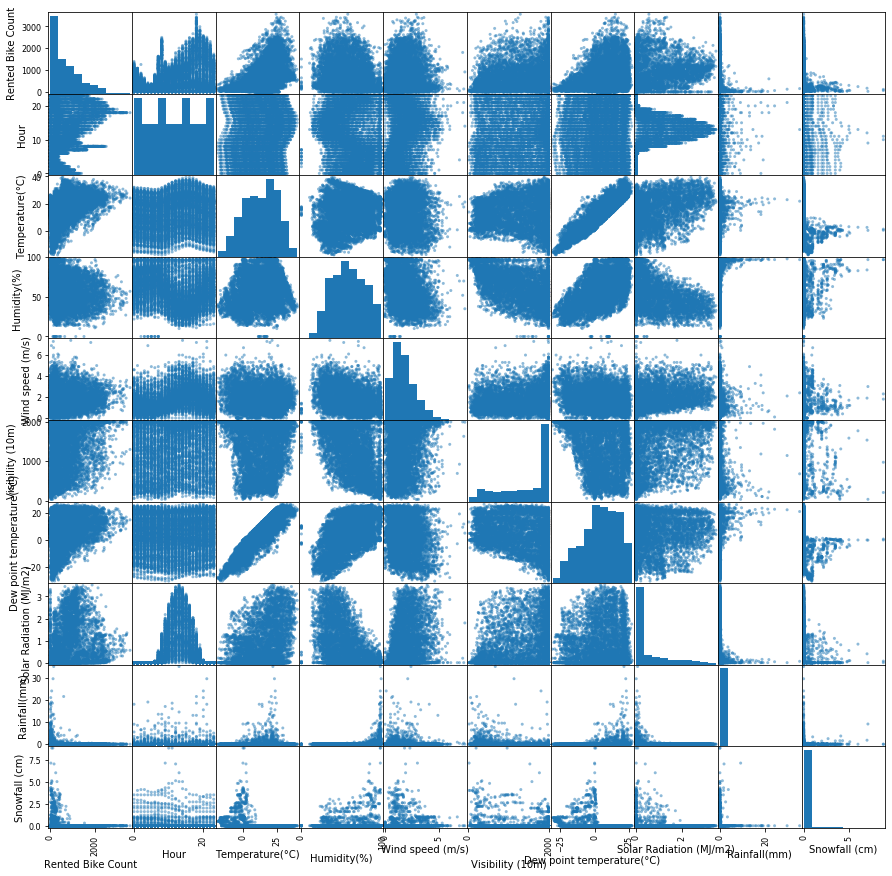

In [338]:
infos = pd.plotting.scatter_matrix(dataset, figsize=(15,15))

# Data Pre-processing

In [300]:
dataset.shape[0], dataset.shape[1]

(8760, 14)

In [159]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [160]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Studying some columns
### Functioning Day

In [161]:
print(dataset["Functioning Day"].where(dataset["Functioning Day"]=="Yes"))

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8755    Yes
8756    Yes
8757    Yes
8758    Yes
8759    Yes
Name: Functioning Day, Length: 8760, dtype: object


In [162]:
j=0
for i in dataset["Functioning Day"].where(dataset["Functioning Day"]=="Yes"):
    if dataset["Functioning Day"].where(dataset["Functioning Day"]=="Yes").any()=='Yes':
        j=j+1
print(j)

8760


In [163]:
print(len(dataset["Visibility (10m)"]))

8760


In [288]:
# 2ème version :
dataset['Functioning Day'].isin(['No']).any()

True

In [293]:
#3ème version :
count=0
for i in dataset['Functioning Day']:
    if i =='No':
        count=count+1
count

295

In [299]:
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

We deduce that the bikes are rented on functioning day and on non functioning day, right above there is the counting. <br> Maybe No is negligeable to Yes ? </br>

### Visibility (10m)

In [165]:
print(dataset["Visibility (10m)"].where(dataset["Visibility (10m)"] == 2000))

0       2000.0
1       2000.0
2       2000.0
3       2000.0
4       2000.0
         ...  
8755       NaN
8756    2000.0
8757       NaN
8758       NaN
8759       NaN
Name: Visibility (10m), Length: 8760, dtype: float64


### Date

I understood that the data is ordered according to the <b>date</b> then the hour : 

In [166]:
#mini_date=min(dataset["Date"])
#maxi_date=max(dataset["Date"])
mini_date=dataset["Date"][0]
maxi_date=dataset["Date"][len(dataset["Date"])-1]
mini_date, maxi_date

('01/12/2017', '30/11/2018')

In [168]:
#dataset['Date']= pd.to_datetime(dataset['Date'])
#dataset['Date']

### Rented Bike Count

In [170]:
dataset["Rented Bike Count"]

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

### Holiday

In [305]:
dataset['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

# What to study ?
### the number of rented bikes according to the Weather conditions and Holidays conditions

I think we don't need to look for the hour (I can't see the interest in it, maybe we can regroup it in a day) 

<b> IDEA: </b>
Regroup the number of rented bike by days (if we don't want hour anymore => pollution of the dataset)

In [171]:
dataset.duplicated(subset='Date')

0       False
1        True
2        True
3        True
4        True
        ...  
8755     True
8756     True
8757     True
8758     True
8759     True
Length: 8760, dtype: bool

#### Duplicates ? 

In [172]:
dataset.duplicated(subset="Hour")
dataset.duplicated(subset="Temperature(°C)")
dataset.duplicated(subset="Humidity(%)")

0       False
1       False
2       False
3       False
4       False
        ...  
8755     True
8756     True
8757     True
8758     True
8759     True
Length: 8760, dtype: bool

Since there are values we don't care about if there are duplicated values. 
There are informations that can be repeated.

If you assemble according to the date without taking into account the Hour I suggest to do a mean of the values for a day.
<br><b> WARNING !! </b></br> We may lose some informations that can help on the representation.

#### NaN ?

In [173]:
dataset['Seasons'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Seasons, Length: 8760, dtype: bool

In [174]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [175]:
c=dataset.columns
NA=[0]*len(c)
NA

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [176]:
c=dataset.columns
NA=[False]*len(c)
j=0
for c0 in c:
    if dataset[c0].any()=='NaN':
        NA[j]=True
    j=j+1
NA   

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [336]:
#2e version
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can see that there is no missing values ;)

## Dataset becoming binary for dtype = object

In [208]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

So it is concerning the columns Seasons, Holiday, Functioning Day.

### Functioning Day

In [297]:
dataset['Functioning Day'].replace(['Yes','No'], ['1','0'], inplace=True)
dataset['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

### Holiday

In [304]:
dataset.replace(['Holiday', 'No Holiday'], ['1','0'], inplace=True)
dataset['Holiday']

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Holiday, Length: 8760, dtype: object

In [303]:
#dataset['Holiday'].any()!='No Holiday'
#We remark that there is no values for Holiday period !!
#We can decide to delete this column. 

### Seasons 

In [280]:
dataset.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [203]:
#dataset= dataset.convert_dtypes()

In [241]:
#dataset['Seasons'] = dataset['Seasons'].apply(lambda x: str(x))
#dataset['Seasons']= dataset['Seasons'].astype(str)
#dataset.Seasons.to_string()
#convert={'Seasons' : str}
#dataset['Seasons']= dataset['Seasons'].astype(str)
dataset['Seasons'] = dataset['Seasons']
dataset['Seasons']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object

In [242]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [249]:
dataset.Seasons.dtype

dtype('O')

In [254]:
dataset.Hour.dtype

dtype('int64')

In [257]:
dataset['Temperature(°C)'].dtype

dtype('float64')

In [281]:
dataset['Seasons'].any()=='Winter',dataset['Seasons'].any()=='Autumn'

(True, False)

don't know why but seasons except Winter are not recognized

In [282]:
#dataset.replace({'Seasons' : {0: 'Winter', 1: 'Spring', 2: 'Summer', 3:'Autumn'}})

dataset.replace(to_replace=['Winter','Spring','Summer', 'Autumn'], value=['0','1','2','3'], inplace=True)
dataset.Seasons

0       0
1       0
2       0
3       0
4       0
       ..
8755    3
8756    3
8757    3
8758    3
8759    3
Name: Seasons, Length: 8760, dtype: object

In [276]:
dataset[dataset['Seasons']=='0']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,28/02/2018,19,19,2.5,95,1.9,838,1.7,0.0,0.0,0.0,0,No Holiday,Yes
2156,28/02/2018,8,20,2.7,96,1.5,1479,2.1,0.0,0.0,0.0,0,No Holiday,Yes
2157,28/02/2018,10,21,2.4,95,2.5,1349,1.6,0.0,9.0,0.0,0,No Holiday,Yes
2158,28/02/2018,13,22,2.3,96,1.9,1207,1.7,0.0,0.0,0.0,0,No Holiday,Yes


In [277]:
dataset[dataset['Seasons']=="Winter"]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


## Looking for different scales 

## Looking for correlations

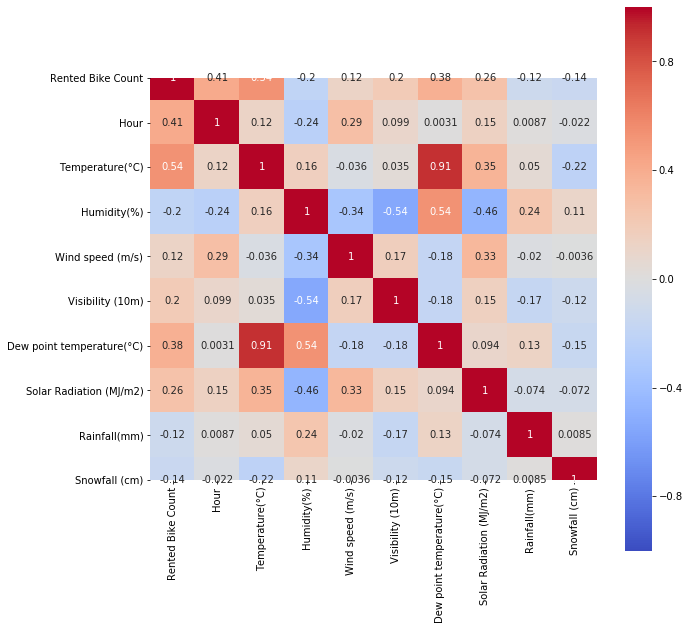

In [347]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("pearson"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

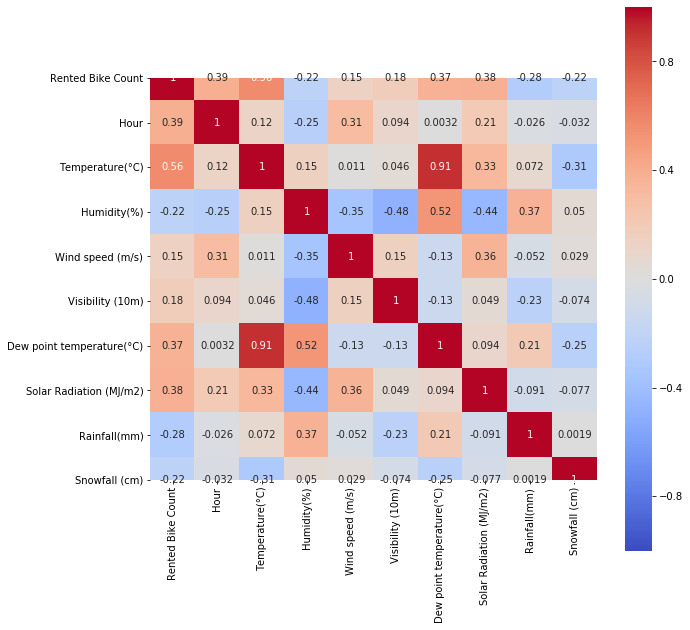

In [348]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("spearman"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True);

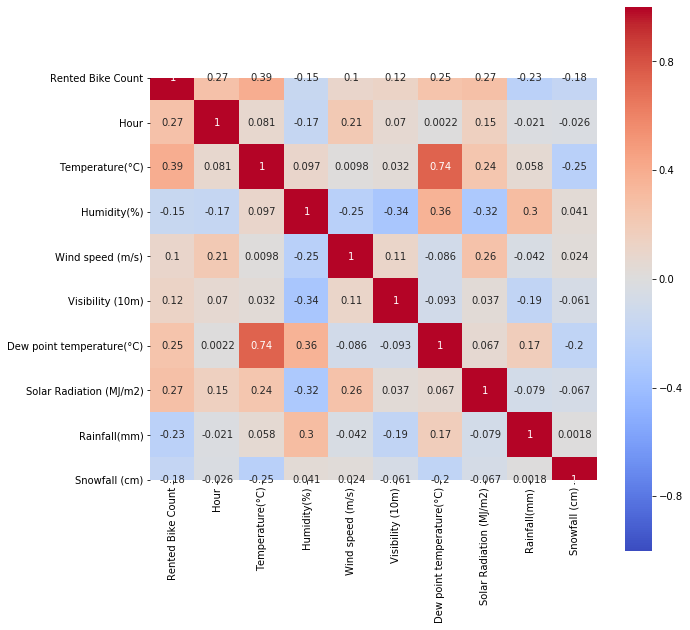

In [349]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr("kendall"),
vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

# Trying models

In [323]:
for a in dataset.columns:
    if (a=='Rented Bike Count') | (a=='Date'):
        print('ok')

ok
ok


In [326]:
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Yes


In [335]:
lm = LinearRegression()
y=dataset['Rented Bike Count']
fig = plt.Figure()

for a in dataset.columns:
    if (a=='Rented Bike Count'):
        pass
    if (a=='Date'):
        break
    else:
        lm.fit(dataset, y)
        sns.lineplot(x="x", y=lm.predict(df), color='r', data=df, ax=fig.gca())
fig

<Figure size 432x288 with 0 Axes>